# sequences and biopython
## 09/21/2023

<a href="?print-pdf">print view</a><br>
<a href="biopython.ipynb">notebook</a>

In [30]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# Sequence data

[http://www.ncbi.nlm.nih.gov](http://www.ncbi.nlm.nih.gov)

[Example](http://www.ncbi.nlm.nih.gov/gene/5216)

# FASTA

First line is description of sequence and starts with `>`

All lines up to the next `>` are part of the same sequence

Usually less than 80 characters per line

```
>gi|568815581:c4949086-4945650 Homo sapiens chromosome 17, GRCh38.p2 Primary Assembly
CCCGCAGGGTCCACACGGGTCGGGCCGGGCGCGCTCCCGTGCAGCCGGCTCCGGCCCCGACCGCCCCATG
CACTCCCGGCCCCGGCGCAGGCGCAGGCGCGGGCACACGCGCCGCCGCCCGCCGGTCCTTCCCTTCGGCG
GAGGTGGGGGAAGGAGGAGTCATCCCGTTTAACCCTGGGCTCCCCGAACTCTCCTTAATTTGCTAAATTT
GCAGCTTGCTAATTCCTCCTGCTTTCTCCTTCCTTCCTTCTTCTGGCTCACTCCCTGCCCCGATACCAAA
GTCTGGTTTATATTCAGTGCAAATTGGAGCAAACCCTACCCTTCACCTCTCTCCCGCCACCCCCCATCCT
TCTGCATTGCTTTCCATCGAACTCTGCAAATTTTGCAATAGGGGGAGGGATTTTTAAAATTGCATTTGCA
```

# Genbank

Annotated format.  Starts with `LOCUS` field.  Can have several other annotation (e.g. `KEYWORDS`, `SOURCE`, `REFERENCE`, `FEATURES`).

`ORIGIN` record indicates start of sequence

'`\\`' indicates the end of sequence

```
LOCUS       CAG28598                 140 aa            linear   PRI 16-OCT-2008
DEFINITION  PFN1, partial [Homo sapiens].
ACCESSION   CAG28598
VERSION     CAG28598.1  GI:47115277
DBSOURCE    embl accession CR407670.1
KEYWORDS    .
SOURCE      Homo sapiens (human)
  ORGANISM  Homo sapiens
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Euarchontoglires; Primates; Haplorrhini;
            Catarrhini; Hominidae; Homo.
ORIGIN      
        1 magwnayidn lmadgtcqda aivgykdsps vwaavpgktf vnitpaevgv lvgkdrssfy
       61 vngltlggqk csvirdsllq dgefsmdlrt kstggaptfn vtvtktdktl vllmgkegvh
      121 gglinkkcye mashlrrsqy
//
```

# Biopython

*Biopython features include parsers for various Bioinformatics file formats (BLAST, Clustalw, FASTA, Genbank,...), access to online services (NCBI, Expasy,...), interfaces to common and not-so-common programs (Clustalw, DSSP, MSMS...), a standard sequence class, various clustering modules, a KD tree data structure etc. and even documentation.*

Other modules that might be of interest:

 *   Pycogent: http://pycogent.org/
 *   bx-python: http://bitbucket.org/james_taylor/bx-python/wiki/Home
 *   DendroPy: http://packages.python.org/DendroPy/
 *   Pygr: http://code.google.com/p/pygr/
 *   bioservices: https://bioservices.readthedocs.io/en/master/
 
Biopython is **not** for performing sequencing itself (see: https://crc.pitt.edu/training/fall-2021-next-generation-sequencing-workshops).

# Sequence Objects

In [31]:
from Bio.Seq import Seq # the submodule structure of biopython is a little awkward

s = Seq("GATTACA")
s

Seq('GATTACA')

Sequences act a lot like strings, but have additional methods.

Methods shared with `str`: `count`, `endswith`, `find`, `lower`, `lstrip`, `rfind`, `split`, `startswith`, `strip`,`upper`

`Seq` methods:`back_transcribe`, `complement`, `reverse_complement`, `tomutable`, `tostring`, `transcribe`, `translate`, `ungap`

# Accessing Seq data

Sequences act like strings (indexed from 0)

In [32]:
s[0]

'G'

In [33]:
s[2:4] #returns sequence

Seq('TT')

In [34]:
s.lower()

Seq('gattaca')

In [35]:
s + s

Seq('GATTACAGATTACA')

# The Central Dogma

```
DNA coding strand (aka Crick strand, strand +1)	 
5’	ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG	3’
 	|||||||||||||||||||||||||||||||||||||||	 
3’	TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC	5’
 	DNA template strand (aka Watson strand, strand −1)	 
                        |	 
                    Transcription	 
                        ↓	 
 
5’	AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG	3’
 	Single stranded messenger RNA	 
                        |	 
                   Translation	 
                        ↓	 
                  MAIVMGR*KGAR*
        amino acid sequence (w/stop codons)
 ```

In [36]:
dna = Seq('GATTACAGATTACAGATTACA')
dna.complement(),dna.reverse_complement()

(Seq('CTAATGTCTAATGTCTAATGT'), Seq('TGTAATCTGTAATCTGTAATC'))

# The Central Dogma

In [37]:
dna

Seq('GATTACAGATTACAGATTACA')

In [38]:
rna = dna.transcribe()
rna

Seq('GAUUACAGAUUACAGAUUACA', RNAAlphabet())

In [39]:
protein = rna.translate()
protein

Seq('DYRLQIT', ExtendedIUPACProtein())

In [40]:
dna.translate() #unlike cells, don't actually need rna

Seq('DYRLQIT', ExtendedIUPACProtein())

# Codon Tables

By default the standard translation table is used, but others can be provided to the translate method.

In [41]:
from Bio.Data import CodonTable
print(sorted(CodonTable.unambiguous_dna_by_name.keys()))

['Alternative Flatworm Mitochondrial', 'Alternative Yeast Nuclear', 'Archaeal', 'Ascidian Mitochondrial', 'Bacterial', 'Balanophoraceae Plastid', 'Blastocrithidia Nuclear', 'Blepharisma Macronuclear', 'Candidate Division SR1', 'Chlorophycean Mitochondrial', 'Ciliate Nuclear', 'Coelenterate Mitochondrial', 'Condylostoma Nuclear', 'Dasycladacean Nuclear', 'Echinoderm Mitochondrial', 'Euplotid Nuclear', 'Flatworm Mitochondrial', 'Gracilibacteria', 'Hexamita Nuclear', 'Invertebrate Mitochondrial', 'Karyorelict Nuclear', 'Mesodinium Nuclear', 'Mold Mitochondrial', 'Mycoplasma', 'Pachysolen tannophilus Nuclear', 'Peritrich Nuclear', 'Plant Plastid', 'Protozoan Mitochondrial', 'Pterobranchia Mitochondrial', 'SGC0', 'SGC1', 'SGC2', 'SGC3', 'SGC4', 'SGC5', 'SGC8', 'SGC9', 'Scenedesmus obliquus Mitochondrial', 'Spiroplasma', 'Standard', 'Thraustochytrium Mitochondrial', 'Trematode Mitochondrial', 'Vertebrate Mitochondrial', 'Yeast Mitochondrial']


In [42]:
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

<img src="../files/amino_acids.svg">

In [43]:
%%html
<div id="seqtrans" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#seqtrans';
	jQuery(divid).asker({
	    id: divid,
	    question: "What amino acid does the codon <tt>CAT</tt> translate to?",
		answers: ['H',"Y","V","A","X"],
        extra: ['Histidine','Tyrosine','Valine','Alanine','Other'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# SeqRecord

Sequence data is read/written as `SeqRecord` objects.

These objects store additional information about the sequence (name, id, description, features)

`SeqIO` reads sequence records: 
  * must specify format
  * `read` to read a file with a single record
  * `parse` to iterate over file with mulitple records

In [44]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
seq = SeqIO.read('../files/p53.gb','genbank')
seq

SeqRecord(seq=Seq('GATGGGATTGGGGTTTTCCCCTCCCATGTGCTCAAGACTGGCGCTAAAAGTTTT...GTG', IUPACAmbiguousDNA()), id='NG_017013.2', name='NG_017013', description='Homo sapiens tumor protein p53 (TP53), RefSeqGene (LRG_321) on chromosome 17', dbxrefs=[])

In [45]:
seqs = []
# https://MSCBIO2025.github.io/files/hydra.fasta
for s in SeqIO.parse('../files/hydra.fasta','fasta'):
    seqs.append(s)

In [46]:
len(seqs)

40

# Fetching sequences from the Internet

Biopython provides and interface to the [NCBI "Entrez" search engine](http://www.ncbi.nlm.nih.gov/sites/gquery)

The results of internet queries are returned as file-like objects.

In [47]:
from Bio import Entrez
Entrez.email = "jpbarton@pitt.edu" # biopython forces you to provide your email
res = Entrez.read(Entrez.einfo())  # the names of all available databases
res

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}

In [48]:
print(sorted(res['DbList']))

['annotinfo', 'assembly', 'biocollections', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'dbvar', 'gap', 'gapplus', 'gds', 'gene', 'genome', 'geoprofiles', 'grasp', 'gtr', 'homologene', 'ipg', 'medgen', 'mesh', 'nlmcatalog', 'nuccore', 'nucleotide', 'omim', 'orgtrack', 'pcassay', 'pccompound', 'pcsubstance', 'pmc', 'popset', 'protein', 'proteinclusters', 'protfam', 'pubmed', 'seqannot', 'snp', 'sra', 'structure', 'taxonomy']


# ESearch

You can search any database for a given term and it will return the ids of all the relevant records.

In [49]:
result = Entrez.esearch(db='nucleotide', term='tp53')  # the result is a file-like object of the raw xml data
records = Entrez.read(result) # put into a more palatable form (dictionary)
print(records)

{'Count': '16953', 'RetMax': '20', 'RetStart': '0', 'IdList': ['2579134893', '2577097206', '1675046266', '1621312268', '1621310586', '1621309831', '1565520846', '1565520832', '1519314995', '1519314531', '1519245996', '1519245289', '1492459888', '2544609391', '2544608770', '2544608358', '2544608205', '1732746165', '2578505094', '2578491630'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'tp53[All Fields]', 'Field': 'All Fields', 'Count': '16953', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'tp53[All Fields]'}


There were <strike>2923</strike> <strike>7616</strike> <strike>8238</strike> <strike>10725</strike> <strike>11850</strike> <strike>12751</strike> <strike>13952</strike> 16943 hits, but by default only 20 are returned.  We can change this ([and other parameters](http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.ESearch)) by changing our search terms.

In [50]:
records = Entrez.read(Entrez.esearch(db='nucleotide', term='tp53', retmax=50))
records

{'Count': '16953', 'RetMax': '50', 'RetStart': '0', 'IdList': ['2579134893', '2577097206', '1675046266', '1621312268', '1621310586', '1621309831', '1565520846', '1565520832', '1519314995', '1519314531', '1519245996', '1519245289', '1492459888', '2544609391', '2544608770', '2544608358', '2544608205', '1732746165', '2578505094', '2578491630', '2544608591', '1677501386', '1677500090', '1653961881', '349585153', '50344732', '2577326767', '2577319026', '2577314085', '2577314083', '2577314081', '2577144630', '2577144628', '2577144626', '2577144624', '2577144622', '2577144620', '2577144618', '2577112865', '2577109742', '2577244898', '2577244896', '2577244894', '2577238979', '2577226876', '2577220539', '2577220537', '2577179306', '2577179304', '2577176327'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'tp53[All Fields]', 'Field': 'All Fields', 'Count': '16953', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'tp53[All Fields]'}

# EFetch

To get the full record for a given id, use `efetch`.  

Must provide `rettype`  ([available options](http://www.ncbi.nlm.nih.gov/books/NBK25499/table/chapter4.T._valid_values_of__retmode_and/?report=objectonly) include fasta and gb)

`retmode` can be text or xml.

In [51]:
#fetch the genbank file for the first id from our search
result = Entrez.efetch(db="nucleotide",id=records['IdList'][0],rettype="gb",retmode='text')
#parse into a seqrecord
p53 = SeqIO.read(result,'gb')

In [52]:
result

<_io.TextIOWrapper encoding='latin-1'>

In [53]:
p53

SeqRecord(seq=Seq('TCAGGGTCCAGGTGATTCTGAACGAGCTGAAAATCGAAGATAAACAACACTTTC...AAA', IUPACAmbiguousDNA()), id='XM_059624316.1', name='XM_059624316', description='PREDICTED: Neocloeon triangulifer TP53-regulated inhibitor of apoptosis 1-like (LOC132199519), mRNA', dbxrefs=['BioProject:PRJNA1017488'])

# Features

Genbank files are typically annotated with features, which refer to portions of the full sequence

`SeqRecord` objects track these features and you can extract the corresponding subsequence

*CDS* - coding sequence

In [54]:
p53.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(712), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(712), strand=1), type='gene'),
 SeqFeature(FeatureLocation(ExactPosition(197), ExactPosition(437), strand=1), type='CDS'),
 SeqFeature(FeatureLocation(ExactPosition(711), ExactPosition(712), strand=1), type='polyA_site')]

# Extracting subsequences

In [55]:
cdsfeature = p53.features[2]
print(cdsfeature)

type: CDS
location: [197:437](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:132199519']
    Key: gene, Value: ['LOC132199519']
    Key: product, Value: ['TP53-regulated inhibitor of apoptosis 1-like']
    Key: protein_id, Value: ['XP_059480299.1']
    Key: translation, Value: ['MNSVGEECNDMKKTYDSCFNAWFSHKFLRGQHDDQMCADLFLKYQQCVKNAMKQQNISIEDVQHFQLGTEEEKKAPPKK']



The subsequence the feature refers to can be extracted from the original full sequence using the feature.

In [56]:
coding = cdsfeature.extract(p53) #pass the full record (p53) to the feature
coding

SeqRecord(seq=Seq('ATGAACAGTGTCGGCGAGGAATGCAACGACATGAAAAAAACTTATGATTCCTGC...TAG', IUPACAmbiguousDNA()), id='XM_059624316.1', name='XM_059624316', description='PREDICTED: Neocloeon triangulifer TP53-regulated inhibitor of apoptosis 1-like (LOC132199519), mRNA', dbxrefs=[])

# BLAST!

Biopython let's you use [NCBI's BLAST](http://blast.ncbi.nlm.nih.gov/Blast.cgi) to search for similar sequences with `qblast` which has three required arguments:
 * **program**: blastn, blastp, blastx, tblastn, tblastx
 * **database**: see website
 * **sequence**: a sequence object

In [57]:
from Bio.Blast import NCBIWWW
result = NCBIWWW.qblast("blastn","nt",coding.seq,hitlist_size=250)
#result is a file-like object with xml in it - it can take a while to get results

In [58]:
from Bio.Blast import NCBIXML #for parsing xmls
blast_records = NCBIXML.read(result)

In [59]:
print(len(blast_records.alignments),len(blast_records.descriptions))

147 147


In [60]:
alignment = blast_records.alignments[0]
print(len(alignment.hsps))

1


In [61]:
hsp = alignment.hsps[0] # high scoring segment pairs
print('****Alignment****')
print('sequence:', alignment.title)
print('length:', alignment.length)
print('e value:', hsp.expect)
print(hsp.query[0:75] + '...')  # what we searched with
print(hsp.match[0:75] + '...')
print(hsp.sbjct[0:75] + '...')  # what we matched to

****Alignment****
sequence: gi|2489302823|emb|OX463782.1| Siphlonurus alternatus genome assembly, chromosome: 5
length: 40728708
e value: 2.75518e-13
ATGAACAGTGTCGGCGAGGAATGCAACGACATGAAAAAAACTTATGATTCCTGCTTCAACGCATGGTTCAGCCAC...
||||| ||||| || || || || |  || ||||| ||    ||||||||||| ||  |    ||||| ||||| ...
ATGAATAGTGTTGGAGAAGAGTGTACTGATATGAAGAAGCAATATGATTCCTGTTTTCATCTTTGGTTTAGCCAA...


In [62]:
alignment = blast_records.alignments[-1] # get last alignment
hsp = alignment.hsps[0]
print('****Alignment****')
print('sequence:', alignment.title)
print('length:', alignment.length)
print('e value:', hsp.expect)
print(hsp.query[0:75] + '...')  # what we searched with
print(hsp.match[0:75] + '...')
print(hsp.sbjct[0:75] + '...')  # what we matched to

****Alignment****
sequence: gi|2362810685|emb|OX371006.1| Yponomeuta malinellus genome assembly, chromosome: 12
length: 19760461
e value: 2.94431
AGAATGCAATGAAGCAGCAAAACAT...
|||||||||||||||||||||||||...
AGAATGCAATGAAGCAGCAAAACAT...


# Creating alignments

Biopython uses `clustal` to perform multiple alignments

The interface is very simple - you construct the `clustal` commandline and must read the result files

In [63]:
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline('clustalw', infile='../files/hydra.fasta',outfile='alignment.aln')

In [64]:
print(cline)

clustalw -infile=../files/hydra.fasta -outfile=alignment.aln


In [65]:
output = cline() #this calls the above, may take a while # If it doesn't work, sudo apt install clustalw

In [66]:
!head alignment.aln

CLUSTAL 2.1 multiple sequence alignment


gi|164609123|gb|ABY62783.1|/1-      ------------MLNIAILCLSCYINYVSCLSLTSPAIIEEVVGRSVTIT
model1_F.pdb                        ------------------------------LSLTSPAIIEEVVGRSVTIT
gi|225423262|gb|ACN91137.1|/1-      ------------MLNIAILSLSCYINYVSCLSLTSPAIIEEVVGRSVTIT
gi|302171750|gb|ADK97776.1|/1-      ------------MLNIAILSLSCYINYVSCLSLTSPAIIEEVVGRSVTIT
gi|302171774|gb|ADK97788.1|/1-      ------------MLNIAILCLSCYINYVSCLSLTSSAIIEEVVNRSVTIT
gi|225423244|gb|ACN91128.1|/1-      ------------MLNIAILCLSCYINYVSCLSLTSSAIIEEVVNRSVTIT
gi|225423272|gb|ACN91142.1|/1-      ------------MLNIAILLLSCYINYVSSLSLTSPAIIEEVVNRSVTIT


# Alignments

`AlignIO` is used to read alignment files (must provide format)

In [67]:
from Bio import AlignIO
align = AlignIO.read('alignment.aln','clustal')

In [68]:
align

<<class 'Bio.Align.MultipleSeqAlignment'> instance (40 records of length 691, SingleLetterAlphabet()) at 1068300a0>

In [69]:
print(align)

SingleLetterAlphabet() alignment with 40 rows and 691 columns
------------MLNIAILCLSCYINYVSCLSLTSPAIIEEVVG...QKK gi|164609123|gb|ABY62783.1|/1-
------------------------------LSLTSPAIIEEVVG...--- model1_F.pdb
------------MLNIAILSLSCYINYVSCLSLTSPAIIEEVVG...QKK gi|225423262|gb|ACN91137.1|/1-
------------MLNIAILSLSCYINYVSCLSLTSPAIIEEVVG...QKK gi|302171750|gb|ADK97776.1|/1-
------------MLNIAILCLSCYINYVSCLSLTSSAIIEEVVN...QKK gi|302171774|gb|ADK97788.1|/1-
------------MLNIAILCLSCYINYVSCLSLTSSAIIEEVVN...QKK gi|225423244|gb|ACN91128.1|/1-
------------MLNIAILLLSCYINYVSSLSLTSPAIIEEVVN...QKK gi|225423272|gb|ACN91142.1|/1-
------------MLNIAILCLSYYVNYVSCLSLTSPAIIEEVVG...QKK gi|302171742|gb|ADK97772.1|/1-
------------MLNIAILCLSYYVNYVSCLSLTSPAIIEEVVG...QKK gi|225423264|gb|ACN91138.1|/1-
------------MLNIAILSLSCYINYVSCLSLTSPAIIEEVVG...QKK gi|302171780|gb|ADK97791.1|/1-
------------MLNIAILCLSCYINYVSCVSLTSPAIIEEVVG...QKK gi|302171756|gb|ADK97779.1|/1-
------------MLNVVILCLSCYINYVSCLSLTSPAIIEEVVG...QKK gi|

# Slicing Alignments

Alignments are sliced just like `numpy` arrays

In [70]:
align[0] #first row

SeqRecord(seq=Seq('------------MLNIAILCLSCYINYVSCLSLTSPAIIEEVVGRSVTITYVTD...QKK', SingleLetterAlphabet()), id='gi|164609123|gb|ABY62783.1|/1-', name='<unknown name>', description='gi|164609123|gb|ABY62783.1|/1-', dbxrefs=[])

In [71]:
align[:,0] #first column

'------------M-----------------M---------'

In [72]:
print(align[:,0:40])

SingleLetterAlphabet() alignment with 40 rows and 40 columns
------------MLNIAILCLSCYINYVSCLSLTSPAIIE gi|164609123|gb|ABY62783.1|/1-
------------------------------LSLTSPAIIE model1_F.pdb
------------MLNIAILSLSCYINYVSCLSLTSPAIIE gi|225423262|gb|ACN91137.1|/1-
------------MLNIAILSLSCYINYVSCLSLTSPAIIE gi|302171750|gb|ADK97776.1|/1-
------------MLNIAILCLSCYINYVSCLSLTSSAIIE gi|302171774|gb|ADK97788.1|/1-
------------MLNIAILCLSCYINYVSCLSLTSSAIIE gi|225423244|gb|ACN91128.1|/1-
------------MLNIAILLLSCYINYVSSLSLTSPAIIE gi|225423272|gb|ACN91142.1|/1-
------------MLNIAILCLSYYVNYVSCLSLTSPAIIE gi|302171742|gb|ADK97772.1|/1-
------------MLNIAILCLSYYVNYVSCLSLTSPAIIE gi|225423264|gb|ACN91138.1|/1-
------------MLNIAILSLSCYINYVSCLSLTSPAIIE gi|302171780|gb|ADK97791.1|/1-
------------MLNIAILCLSCYINYVSCVSLTSPAIIE gi|302171756|gb|ADK97779.1|/1-
------------MLNVVILCLSCYINYVSCLSLTSPAIIE gi|225423288|gb|ACN91150.1|/1-
MKLVIVIPNDENLLNIAILCLSCYLNYVSCLSLTSPAIIE gi|225423270|gb|ACN91141.1|/1-
------------MLNIAILCL

# And now for a brief foray into marine microbiology...

https://MSCBIO2025.github.io/files/hydra.fasta

<img src="./imgs/sequence_project/sequence_project.001.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.002.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.003.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.004.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.005.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.006.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.007.png" width="100%">

<img src="./imgs/sequence_project/sequence_project.008.png" width="100%">

# Project

We have a gene (alr2), but what part of the gene is responsible for allorecognition?

Given 179 sequences, how might we find out?

https://MSCBIO2025.github.io/files/hydra179.aln

Find the part of the sequence that changes the most.
 * Count number of distinct residues at each position. Plot.
 * Count number of distinct *subsequences* of length 10 at each position. Plot.

<img src="./imgs/sequence_project/sequence_project.011.png">

In [73]:
!wget https://MSCBIO2025.github.io/files/hydra179.aln

--2023-09-21 12:27:54--  https://mscbio2025.github.io/files/hydra179.aln
Resolving mscbio2025.github.io (mscbio2025.github.io)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to mscbio2025.github.io (mscbio2025.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mscbio2025.net/files/hydra179.aln [following]
--2023-09-21 12:27:54--  https://mscbio2025.net/files/hydra179.aln
Resolving mscbio2025.net (mscbio2025.net)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to mscbio2025.net (mscbio2025.net)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218936 (214K) [application/octet-stream]
Saving to: ‘hydra179.aln’

hydra179.aln        100%[===================>] 213.80K  --.-KB/s    in 0.01s   

2023-09-21 12:27:55 (16.1 MB/s) - ‘hydra179.aln’ saved [218936/218936]



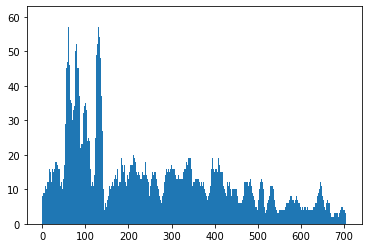

In [74]:
import matplotlib.pyplot as plt
from Bio import AlignIO

def countatpos(seqs,pos):
    '''count the number of unique subsequences of length 10 at pos in seqs'''
    vals = set()
    for s in seqs:
        vals.add(str(s[pos:pos+10].seq))
    return len(vals)

seqs = AlignIO.read("hydra179.aln",'clustal');

xaxis = list()
yaxis = list()
for i in range(seqs.get_alignment_length()):
    xaxis.append(i)
    yaxis.append(countatpos(seqs,i))

plt.bar(xaxis,yaxis,width=1);